In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')

In [ ]:
months = df.job_posted_month.unique()
months

array(['Jun', 'Jan', 'Oct', 'Jul', 'Aug', 'Nov', 'Mar', 'Dec', 'Apr',
       'Feb', 'Sep', 'May'], dtype=object)

In [9]:
dict_months = {month:df[df['job_posted_month']==month]  for month in months}
dict_months['Jan']

job_title_short                                  job_title  \
1            Data Analyst                               Data Analyst   
20         Data Scientist                             Data Scientist   
39          Data Engineer                              Data Engineer   
53          Data Engineer                              Data Engineer   
55         Data Scientist                             Data Scientist   
...                   ...                                        ...   
785699  Software Engineer                        Simulation Engineer   
785700      Data Engineer                       Data Engineer Ssr/Sr   
785703       Data Analyst    Data Analyst - CRYPTOGRAPHY - Full-time   
785704   Business Analyst                           Business Analyst   
785705       Data Analyst  Expert Business Data Analyst - Now Hiring   

                                 job_location             job_via  \
1                Guadalajara, Jalisco, Mexico    via BeBee México   
20                          Zaventem, Belgium  via BeBee Belgique   
39                             Fort Worth, TX        via LinkedIn   
53                              San Mateo, CA        via LinkedIn   
55      São Paulo, State of São Paulo, Brazil           via BeBee   
...                                       ...                 ...   
785699                        Prague, Czechia     via Trabajo.org   
785700              Mexico City, CDMX, Mexico     via Trabajo.org   
785703                               Anywhere        via Snagajob   
785704                        Prague, Czechia     via Trabajo.org   
785705                            Oakland, CA        via Snagajob   

       job_schedule_type  job_work_from_home            search_location  \
1              Full-time               False                     Mexico   
20             Full-time               False                    Belgium   
39             Full-time               False       Texas, United States   
53             Full-time               False  California, United States   
55             Full-time               False                     Brazil   
...                  ...                 ...                        ...   
785699         Full-time               False                    Czechia   
785700         Full-time               False                     Mexico   
785703         Full-time                True       Texas, United States   
785704         Full-time               False                    Czechia   
785705         Full-time               False  California, United States   

           job_posted_date  job_no_degree_mention  job_health_insurance  \
1      2023-01-14 13:18:07                  False                 False   
20     2023-01-31 13:53:38                  False                 False   
39     2023-01-25 13:24:01                  False                 False   
53     2023-01-28 13:07:30                  False                  True   
55     2023-01-03 23:02:27                  False                 False   
...                    ...                    ...                   ...   
785699 2023-01-16 06:35:30                  False                 False   
785700 2023-01-12 06:19:55                   True                 False   
785703 2023-01-28 06:02:55                   True                 False   
785704 2023-01-16 06:35:20                  False                 False   
785705 2023-01-09 06:00:25                  False                 False   

          job_country salary_rate  salary_year_avg  salary_hour_avg  \
1              Mexico        None              NaN              NaN   
20            Belgium        None              NaN              NaN   
39      United States        None              NaN              NaN   
53      United States        None              NaN              NaN   
55             Brazil        None              NaN              NaN   
...               ...         ...              ...              ...   
785699        Cze

In [11]:
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)

<Axes: xlabel='job_posted_month'>

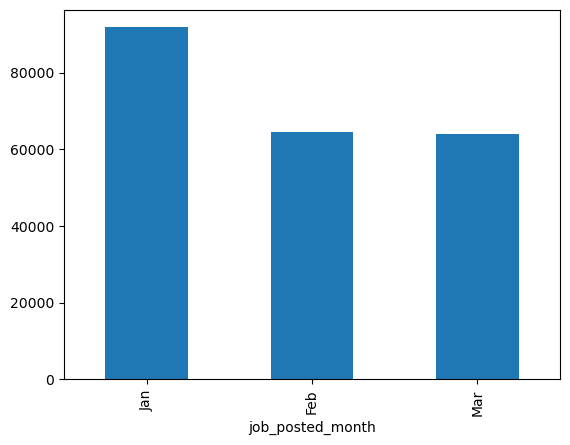

In [14]:
df_q1.job_posted_month.value_counts().plot(kind='bar')

Problems

In [23]:
df_scientist_df = df[df['job_title_short']=='Data Scientist']
df_analyst_df = df[df['job_title_short']=='Data Analyst']

In [26]:
combined_df = pd.concat([df_scientist_df, df_analyst_df], ignore_index=True)
combined_df

job_title_short                                          job_title  \
0       Data Scientist                                  Data Scientist II   
1       Data Scientist                             Data Science Team Lead   
2       Data Scientist                                     Data Scientist   
3       Data Scientist                                     Data Scientist   
4       Data Scientist  Stage - data scientist – génération ia de donn...   
...                ...                                                ...   
368356    Data Analyst            Data Analyst - CRYPTOGRAPHY - Full-time   
368357    Data Analyst          Expert Business Data Analyst - Now Hiring   
368358    Data Analyst  Amul Careers 2023 - Apply Online - Data Analys...   
368359    Data Analyst                 Data & Analytics Architect (w/m/x)   
368360    Data Analyst                                   CRM Data Analyst   

                      job_location  \
0                         Anywhere   
1                       Laurel, MD   
2         Pune, Maharashtra, India   
3                Zaventem, Belgium   
4       Asnières-sur-Seine, France   
...                            ...   
368356                    Anywhere   
368357                 Oakland, CA   
368358                       India   
368359              Erfurt, Jerman   
368360          Bad Rodach, Jerman   

                                                  job_via job_schedule_type  \
0                                        via ZipRecruiter         Full-time   
1       via APL Careers - Johns Hopkins University App...         Full-time   
2                                              via Indeed         Full-time   
3                                      via BeBee Belgique         Full-time   
4                                            via Jobijoba         Full-time   
...                                                   ...               ...   
368356                                       via Snagajob         Full-time   
368357                                       via Snagajob         Full-time   
368358  melalui Jobsleworld - Jobs In India - Job Vaca...   Pekerjaan tetap   
368359                                   melalui LinkedIn   Pekerjaan tetap   
368360                          melalui BeBee Deutschland   Pekerjaan tetap   

        job_work_from_home            search_location     job_posted_date  \
0                     True    New York, United States 2023-04-23 13:02:57   
1                    False                    Georgia 2023-06-13 13:25:17   
2                    False                      India 2023-04-26 13:20:12   
3                    False                    Belgium 2023-01-31 13:53:38   
4                    False                     France 2023-02-23 13:41:21   
...                    ...                        ...                 ...   
368356                True       Texas, United States 2023-01-28 06:02:55   
368357               False  California, United States 2023-01-09 06:00:25   
368358               False                      India 2023-03-13 06:16:28   
368359               False                    Germany 2023-03-12 06:18:18   
368360               False                    Germany 2023-03-12 06:18:18   

        job_no_degree_mention  job_health_insurance    job_country  \
0                       False                 False  United States   
1                       False                  True  United States   
2                       False                 False          India   
3                       False                 False        Belgium   
4                       False                 False         France   
...                       ...                   ...            ...   
368356                   True                 False  United States   
368357                  False                 False  United States   
368358                  False                 False          India   
368359                  False                 False

In [29]:
oct_df = df[df['job_posted_month']=='Oct']
nov_df = df[df['job_posted_month']=='Nov']
dec_df = df[df['job_posted_month']=='Dec']

combined_df2 = pd.concat([oct_df, nov_df, dec_df], ignore_index=True)
combined_df2

job_title_short                                          job_title  \
0          Data Engineer  Data Engineer/Scientist/Analyst, Mid or Senior...   
1          Data Engineer                                      Data Engineer   
2           Data Analyst                                       Data Analyst   
3           Data Analyst                           Stage - Data Analyst F/H   
4           Data Analyst  Data Analyst (Bangkok Based, relocation provided)   
...                  ...                                                ...   
187359     Data Engineer                                      Data Engineer   
187360     Data Engineer                                      Data Engineer   
187361      Data Analyst                                  Data Analyst Lead   
187362  Business Analyst         Business Analysis and Intelligence Manager   
187363    Cloud Engineer                             Engineer 3, Facilities   

                                             job_location  \
0                                         Berlin, Germany   
1                                            Aberdeen, UK   
2                                          Warsaw, Poland   
3                                           Paris, France   
4          Rome, Metropolitan City of Rome Capital, Italy   
...                                                   ...   
187359                          Ho Chi Minh City, Vietnam   
187360                                 Gothenburg, Sweden   
187361                                           Thailand   
187362  Kuala Lumpur, Federal Territory of Kuala Lumpu...   
187363                                   Penang, Malaysia   

                          job_via         job_schedule_type  \
0                    via LinkedIn                 Full-time   
1                    via LinkedIn                 Temp work   
2           via Praca Trabajo.org                 Full-time   
3                    via LinkedIn  Full-time and Internship   
4                    via LinkedIn                 Full-time   
...                           ...                       ...   
187359            via Trabajo.org                 Full-time   
187360            via Trabajo.org                 Full-time   
187361            via Trabajo.org                 Full-time   
187362            via Trabajo.org                 Full-time   
187363  via Smart Recruiters Jobs                 Full-time   

        job_work_from_home search_location     job_posted_date  \
0                    False         Germany 2023-10-10 13:14:55   
1                    False  United Kingdom 2023-10-19 13:37:16   
2                    False          Poland 2023-10-16 13:36:54   
3                    False          France 2023-10-19 13:59:31   
4                    False           Italy 2023-10-30 13:13:21   
...                    ...             ...                 ...   
187359               False         Vietnam 2023-12-17 06:23:18   
187360               False          Sweden 2023-12-13 06:49:09   
187361               False        Thailand 2023-12-17 06:16:04   
187362               False        Malaysia 2023-12-05 06:22:35   
187363               False        Malaysia 2023-12-21 06:12:22   

        job_no_degree_mention  job_health_insurance     job_country  \
0                       False                 False         Germany   
1                       False                 False  United Kingdom   
2                       False                 False          Poland   
3                       False                 False          France   
4                       False                 False           Italy   
...                       ...                   ...             ...   
187359                  False                 False         Vietnam   
187360                  False                 False          Sweden   
187361                  False                 False        Thailand   
187362                  False                 False        Malaysia

In [33]:
full_time_df = df[df['job_schedule_type']=='Full-time']
part_time_df = df[df['job_schedule_type']=='Part-time']

combined_df3 = pd.concat([full_time_df, part_time_df], ignore_index=True)
combined_df3

job_title_short  \
0       Senior Data Engineer   
1               Data Analyst   
2              Data Engineer   
3              Data Engineer   
4              Data Engineer   
...                      ...   
709603         Data Engineer   
709604  Senior Data Engineer   
709605        Data Scientist   
709606      Business Analyst   
709607        Data Scientist   

                                                job_title  \
0       Senior Clinical Data Engineer / Principal Clin...   
1                                            Data Analyst   
2       Data Engineer/Scientist/Analyst, Mid or Senior...   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                                  Data Engineer- Sr Jobs   
...                                                   ...   
709603                                     Data Engineer*   
709604                               Senior Data Engineer   
709605     Математик, Junior/Middle/Senior Data Scientist   
709606                                            Analyst   
709607  Consultant Data Science & berufsbegleitender M...   

                        job_location             job_via job_schedule_type  \
0                      Watertown, CT     via Work Nearby         Full-time   
1       Guadalajara, Jalisco, Mexico    via BeBee México         Full-time   
2                    Berlin, Germany        via LinkedIn         Full-time   
3                    San Antonio, TX   via Diversity.com         Full-time   
4                     Washington, DC  via Clearance Jobs         Full-time   
...                              ...                 ...               ...   
709603            Karlsruhe, Germany           via BeBee         Part-time   
709604               Porto, Portugal  via BeBee Portugal         Part-time   
709605                      Anywhere       via Rabota.by         Part-time   
709606                      Anywhere        via LinkedIn         Part-time   
709607               Munich, Germany      via Monster.de         Part-time   

        job_work_from_home       search_location     job_posted_date  \
0                    False  Texas, United States 2023-06-16 13:44:15   
1                    False                Mexico 2023-01-14 13:18:07   
2                    False               Germany 2023-10-10 13:14:55   
3                    False  Texas, United States 2023-07-04 13:01:41   
4                    False                 Sudan 2023-08-07 14:29:36   
...                    ...                   ...                 ...   
709603               False               Germany 2023-10-31 06:11:43   
709604               False              Portugal 2023-10-04 06:16:58   
709605                True               Belarus 2023-01-30 06:45:28   
709606                True                 India 2023-05-21 06:00:44   
709607               False               Germany 2023-01-15 06:20:06   

        job_no_degree_mention  job_health_insurance    job_country  \
0                       False                 False  United States   
1                       False                 False         Mexico   
2                       False                 False        Germany   
3                        True                 False  United States   
4                       False                 False          Sudan   
...                       ...                   ...            ...   
709603                  False                 False        Germany   
709604                   True                 False       Portugal   
709605                  False                 False        Belarus   
709606                  False                 False          India   
709607                  False                 False        Germany   

       salary_rate  salary_year_avg  salary_hour_avg  \
0             None              NaN              NaN   
1             None              NaN              NaN   
2             None              NaN              NaN   
3             None          